In [1]:
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
num_friends = [100, 49, 41, 40, 25, 2, 2, 3, 1, 2, 3, 2, 4, 4, 5, 4, 3, 4, 5, 4 ,3 ,1]

In [3]:
friends_counts = Counter(num_friends)
xs = range(max(num_friends) + 1)
ys = [friends_counts[x] for x in xs]

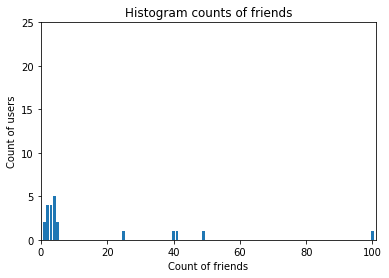

In [4]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram counts of friends")
plt.xlabel("Count of friends")
plt.ylabel("Count of users")
plt.show()

In [5]:
num_points = len(num_friends)
num_points

22

In [6]:
largest_value = max(num_friends)
largest_value

100

In [7]:
smallest_value = min(num_friends)
smallest_value

1

In [8]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]

In [9]:
from typing import List

In [10]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

13.954545454545455

In [11]:
def _median_odd(xs: List[float]) -> float:
    '''if len(xs) is odd then median is center element'''
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    ''' if len(xs) is even then median is mean of 2 center elements'''
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [12]:
def median(v: List[float]) -> float:
    '''Return median of vector v'''
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [13]:
median(num_friends)

4.0

In [14]:
def quantile(x: List[float], p: float) -> float:
    '''Return from x, value being p-tym percentyl'''
    p_index = int(p * len(x))
    return sorted(x)[p_index]

assert quantile(num_friends, 0.05) == 1

In [15]:
num_friends

[100, 49, 41, 40, 25, 2, 2, 3, 1, 2, 3, 2, 4, 4, 5, 4, 3, 4, 5, 4, 3, 1]

In [16]:
def mode(x: List[float]) -> List[float]:
    '''Return a list, set can contain more than one dominant'''
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

assert set(mode(num_friends)) == {4}

In [17]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [18]:
def interquartile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 3

In [19]:
from scratch.linear_algebra import dot

ModuleNotFoundError: No module named 'scratch'

In [20]:
import scratch

ModuleNotFoundError: No module named 'scratch'